In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Symbol
from sympy.physics.continuum_mechanics.beam import Beam
sym.init_printing()
%config InlineBackend.figure_formats = ['svg']

In [6]:
a = sym.symbols('a',real=True)
x = sym.Symbol('x')
E = sym.Symbol('E')
I = sym.Symbol('I')
A_v = sym.Symbol('A_v')
B_v = sym.Symbol('B_v')
C_v = sym.Symbol('C_v')
C_1, C_2, C_3, C_4 = sym.symbols('C_1 C_2 C_3 C_4')
q = A_v * sym.SingularityFunction(x, 0 , -1) +  B_v * sym.SingularityFunction(x, 5, -1) + C_v * sym.SingularityFunction(x, 10, -1) + 1 * sym.SingularityFunction(x,a, -1)
display(q)

In [7]:
V = -sym.integrate(q, x) + C_1
M = sym.integrate(V, x) + C_2
kappa = M / E / I
phi = sym.integrate(kappa, x) + C_3 
w = -sym.integrate(phi, x) + C_4

In [8]:
Eq1 = sym.Eq(w.subs(x,0),0)
Eq2 = sym.Eq(w.subs(x,5),0)
Eq3 = sym.Eq(w.subs(x,10),0)
Eq4 = sym.Eq(M.subs(x,0-1),0)
Eq5 = sym.Eq(M.subs(x,10+1),0)
Eq6 = sym.Eq(V.subs(x,0-1),0)
Eq7 = sym.Eq(V.subs(x,10+1),0)

In [9]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7),(C_1,C_2,C_3,C_4,A_v,B_v,C_v))
display(sol)

In [13]:
E = Symbol('E')
I = Symbol('I')
a = Symbol('a')
b = Beam(10, E, I)
r0 = b.apply_support(0, type="pin")
r5 = b.apply_support(5, type="pin")
r10 = b.apply_support(10, type="pin")
b.solve_for_ild_reactions(1, r0, r5, r10)
display(b.ild_reactions)

In [21]:
b.ild_reactions[r0].subs(a, 0)

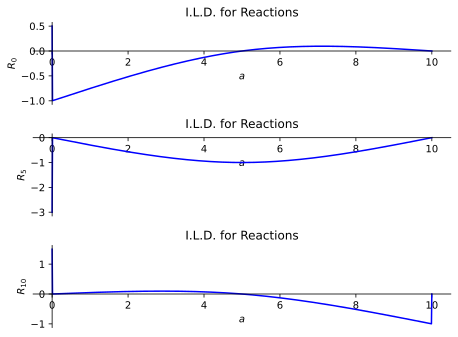

In [22]:
b.plot_ild_reactions();